In [1]:
!pip install researchpy

In [0]:
#import all the necessary packages
import statsmodels.api as sm
import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import scale
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [0]:
bp_reading = pd.read_csv('/content/drive/My Drive/hypothesis_exercise_file/02/demos/datasets/blood_pressure.csv')

* THe Dataset contains blood pressure readings before and after an intervention.

In [4]:
bp_reading.shape  #checking the shape of dataset

(120, 5)

In [5]:
bp_reading.head(5) #check the head of the Dataset

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [6]:
bp_reading.describe().T #checking the description of the data

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


Here we can see that mean bwforw intervention was 156.45 and mean after intervention is 151.36. We want to check is the difference in the mean statstically significant or not.

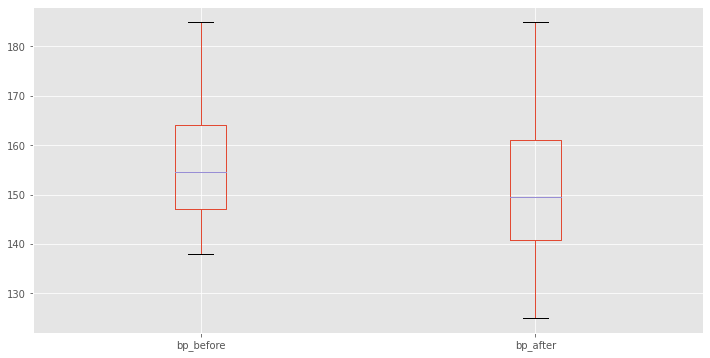

In [11]:
bp_reading[['bp_before','bp_after']].boxplot(figsize=(12,6)) #checkingthe description of data visually
plt.show()

##Check the Assumptions for T-Test

In [0]:
#levene's test to check the assumption of equal variance
#H0 : Variances are equal
#H1 : Variances are not equal
#Alpha : 0.05

In [20]:
alpha = 0.05
statisctics,p_value = stats.levene(bp_reading['bp_before'],bp_reading['bp_after'])
if p_value > alpha:
  print('Fail to Reject H0.\n Variances are equall')
else:
  print('Reject H0.\n Variances are not equall')

Reject H0.
 Variances are not equall


In [0]:
##Check for normality

In [0]:
#compute difference b/w bp_before and bp_after
#scale the difference 
#plot histogram

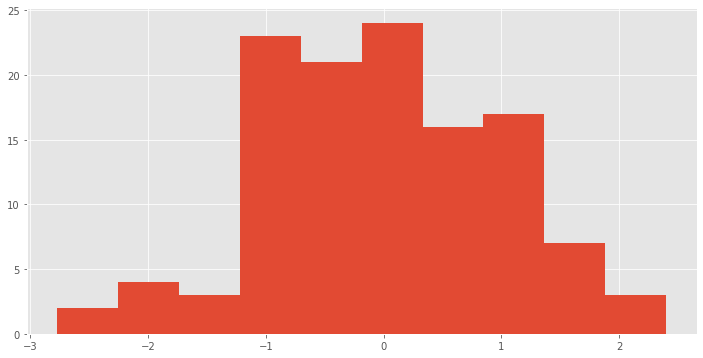

In [25]:
bp_reading['diff'] = scale(bp_reading['bp_before'] - bp_reading['bp_after'])
plt.figure(figsize=(12,6))
plt.hist(bp_reading['diff'])
plt.show()

Our Distribution is somewhat normally Distributed.

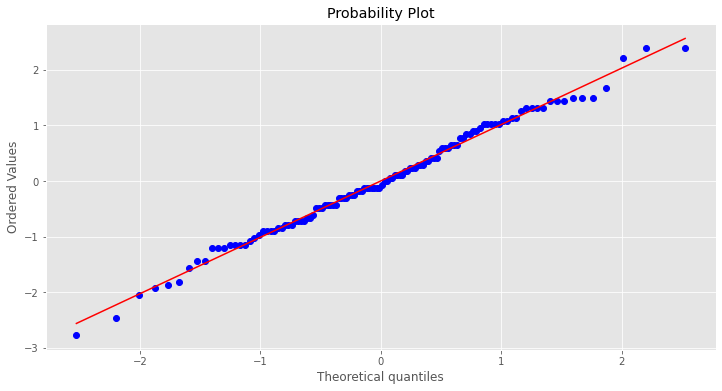

In [26]:
#check normality using probplot
plt.figure(figsize=(12,6))
stats.probplot(bp_reading['diff'],plot=plt,dist='norm')
plt.show()

In [29]:
#Let's use shapiro-wilk test to check normality
#H0 : Residuals are normally distributed
#H1 : Residuals are not normally distributed
alpha = 0.05
statisctics,p_value = stats.shapiro(bp_reading['diff'])
if p_value > alpha:
  print('Failed to reject null hypothesis \n P-value: {}'.format(p_value))
else:
  print('Reject null hypothesis \n P-value: {}'.format(p_value))

Failed to reject null hypothesis 
 P-value: 0.7841646671295166


Shapiro test confirms that the data is normally distributed.

In [31]:
#H0 : There's no difference in mean(No difference before and after an intervention)
#H1 : There's a difference in mean (There is difference before and after an intervention)
#Alpha : 0.5
statistics,p_value = stats.ttest_rel(bp_reading['bp_after'],bp_reading['bp_before'])
if p_value > alpha:
  print('Failed to reject H0.\n P-value{}'.format(p_value))
else:
  print('Reject H0.\n P-value{}'.format(p_value))

Reject H0.
 P-value0.0011297914644840823


Here our pvalue is less than alpha so we can reject the H0. It means that there's a difference before and after an intervention. 


---

We performed independent sample ttest though our assumption of equal variance was voilated. When Assumption of equal variance is voilated we use Wilcoxon Signed Rank test. We will use researchpy library to do that.


In [33]:
#here we have assigned the paramter paired = True to pperform paired ttest.
#we have specified equal variances = False as using levene's test we got to know the variances are not equal
rp.ttest(bp_reading['bp_before'],bp_reading['bp_after'],paired=True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


As we can see pvalue here is less than alpha. So there's difference in mean before and after an intervention.

---

